<a href="https://colab.research.google.com/github/kiran101815174/predicting_rock_paper_scissors/blob/main/rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_path='/content/drive/MyDrive/rps_dataset/rps-train'
test_path='/content/drive/MyDrive/rps_dataset/rps-test-set'

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

now lets view the sample images in training set

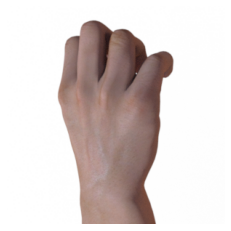

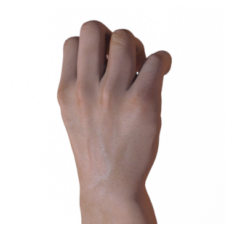

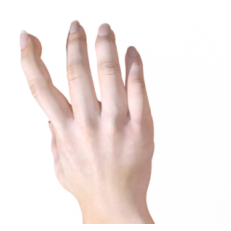

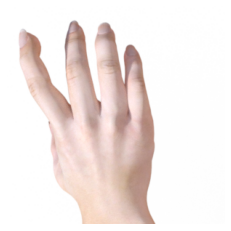

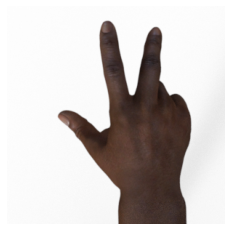

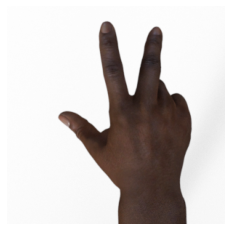

In [ ]:
paper_dir='/content/drive/MyDrive/rps_dataset/rps-train/paper'
rock_dir='/content/drive/MyDrive/rps_dataset/rps-train/rock'
scissor_dir='/content/drive/MyDrive/rps_dataset/rps-train/scissors'
rock_files=os.listdir(rock_dir)
paper_files=os.listdir(paper_dir)
scissor_files=os.listdir(scissor_dir)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
rock_file=[os.path.join(rock_dir,fname) for fname in rock_files[0:2] ]
paper_file=[os.path.join(paper_dir,fname) for fname in paper_files[0:2] ]
scissor_file=[os.path.join(scissor_dir,fname) for fname in scissor_files[0:2] ]
for i,img_path in enumerate(rock_file+paper_file+scissor_file):
  img=mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

now that we completed downloading and seeing the data **its time for preprocessing data**
**preprocessing data involves**
1)normalzing it by dividing every pixel by 255 
2) image augmentation to reduce overfitting
3)resizing the images to a fixed size here it is(150,150)

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                 fill_mode='nearest',horizontal_flip=True,shear_range=0.2,
      zoom_range=0.2,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_path,target_size=(150,150),batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
#lets introduce a call back
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy') >= 0.97):
      print('97 % reached')
      self.model.stop_training=True

now that we have completed the preprocessing lets dive into model creation where we use keras to generate cnn and dense neural networks

In [ ]:
model=keras.models.Sequential([# Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
callbacks=myCallback()
history=model.fit(train_generator, epochs=25, steps_per_epoch=10, validation_data = validation_generator, verbose = 1, validation_steps=3,callbacks=[callbacks])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.save('rps.h5')

now after getting accuracy and loss lets plot the diagram and see it visually to get an over view of what happened during the computations

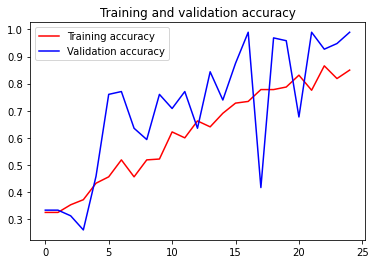

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path=fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(np.argmax(classes))
  print(classes)

Saving kat.jpeg to kat.jpeg
kat.jpeg
1
[[0. 1. 0.]]


In [ ]:
import cv2
vid= cv2.VideoCapture(0)
while(True):
  ret,frame=vid.read()
  print(frame.shape)
  img=cv2.resize(frame,(150,150),interpolation=cv2.INTER_AREA)
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if np.argmax(classes)==0:
    text='rock'
  elif np.argmax(classes)==1:
    text='paper'
  else:
    text='scissor' 

  font = cv2.FONT_HERSHEY_SIMPLEX 
  org = (50, 50)  
  fontScale = 1 
  color = (255, 0, 0) 
  thickness = 2  
# Using cv2.putText() method 
  image = cv2.putText(frame, text, org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imshow('image',frame)
  if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows()

AttributeError: ignored

since collab is running on your browser you need web API's to run video capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


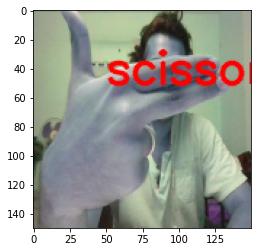

In [ ]:
from IPython.display import Image
from keras.preprocessing.image import img_to_array
filename = take_photo()
print('Saved to {}'.format(filename))
frame=cv2.imread('/content/photo.jpg')
img=cv2.resize(frame,(150,150),interpolation=cv2.INTER_AREA)
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes = model.predict(images, batch_size=10)
if np.argmax(classes)==0:
    text='rock'
elif np.argmax(classes)==1:
    text='paper'
else:
    text='scissor' 

font = cv2.FONT_HERSHEY_SIMPLEX 
org = (50, 50)  
fontScale = 1 
color = (255, 0, 0) 
thickness = 2  
# Using cv2.putText() method 
image = cv2.putText(img, text, org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
  # Show the image which was just taken.
plt.imshow(img)
